## !!!
No discriminative features.
Crevasses between the books is the only option.

considering the "noisy" nature of book shelf images, the typical processing of images which stats with grayscaling, then blurring, then thresholding and etc did not work. Mainly due to the fact that a lot of the edges were lost during the process. 

For this reason the best approach I have came up with is the one where Canny edging is applied on the original image followed by a custom/augmented Hough transform to leave long vertical edges only.

Eurika: Let's use masking. When bottoms or tops of the books get into the picture it adds a lot of unnecessary features adding up to the overal noise and thus 

Other ideas for further enhancement:
- If histogram shows high value for dark pixels (dark-gray to black) decrease the Hough threshold to capture more lines
- Using the top and bottom parts of an image, infer the background color which then can be used to nudge the Hough threshold
- fixed height of the frame (mask) allows to look for straight lines
- using template matching might work. When grayscaled, our lines can go from dark to light or light to dark. Looping through a set of templates and selecting only the high-scroed matches might work !!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import imutils

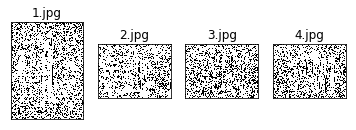

In [4]:
imagePaths = ['images/3.jpg', 'images/13.jpg', 'images/14.jpg', 'images/7.jpg']
images = []
for filename in imagePaths:
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    #res = imutils.resize(thresh, width = 760)
    images.append(thresh)

for i in range(len(images)):
    plt.subplot(1, 4, i + 1), plt.imshow(images[i], 'gray')
    plt.title(str(i+1) + ".jpg")
    plt.xticks([]),plt.yticks([])
plt.show()

#### Canny on the original image
- Applying Canny on original (but grayscaled) image works ok, but lots of noise is included.

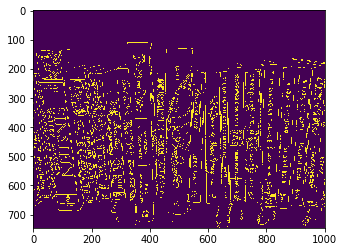

In [17]:
image = cv2.imread("images/7.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
res = imutils.resize(gray, width = 1000)
can = cv2.Canny(res, 30, 150)

plt.imshow(can)
plt.show()

#### Canny after applying the Bilateral filter.
Under a higher resolution we can see that a lot of noise is gone, but so do some important edges. Ironic, considering that overall, Bilateral filtering is known to be able to preserve edges of an image, while still reducing noise. 
(_The largest downside to this method is that it is considerably slower than its averaging, Gaussian, and median blurring counterparts_).

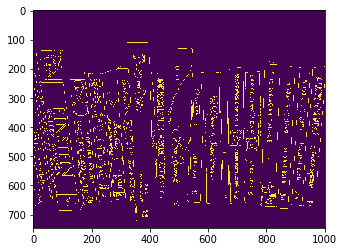

In [18]:
image = cv2.imread("images/7.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
res = imutils.resize(gray, width = 1000)
bilat = cv2.bilateralFilter(res, 9, 41, 41)
can = cv2.Canny(bilat, 30, 150)
plt.imshow(can)
plt.show()

#### Erode > Dilate (or Dilate > Erode)
Another suggested technique to remove the noise along with small objects is to process the image with **open** or **close** operation (or both), that is, erode followed by dilate, or dilate followed by erode. This should remove the smaller objects but leave the larger ones roughly the same.